In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# 입법

In [32]:
import pandas as pd
import numpy as np
laws = pd.read_csv('./second_laws.csv')
laws

,CONTENT,INITIATION DATE,RELEVANT DEPARTMENT,CATEGORY
0,근로기준법 일부개정법률안,2019-08-01,고용노동부,일자리
1,담배사업법 일부개정법률안,2019-08-01,기획재정부,행정
2,원자력안전위원회의 설치 및 운영에 관한 법률 일부개정법률안,2019-08-01,원자력안전위원회,안전/환경
3,원자력안전법 일부개정법률안,2019-08-01,원자력안전위원회,안전/환경
4,관광진흥법 일부개정법률안,2019-08-01,문화체육관광부,문화/예술/체육/언론
...,...,...,...,...
17944,스토킹범죄의 처벌 등에 관한 법률 일부개정법률안,2022-05-06,법무부,정치개혁
17945,정부조직법 일부개정법률안,2022-05-06,행정안전부,행정
17946,국가유공자 등 예우 및 지원에 관한 법률 일부개정법률안,2022-05-06,국가보훈처,보건복지
17947,화물자동차 운수사업법 일부개정법률안,2022-05-06,국토교통부,교통/건축/국토


In [33]:
from datetime import datetime
laws['INITIATION DATE']=pd.to_datetime(laws['INITIATION DATE'])
laws.sort_values(by=['INITIATION DATE'],inplace=True)
laws.reset_index(drop=True,inplace=True)
laws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17949 entries, 0 to 17948
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CONTENT              17949 non-null  object        
 1   INITIATION DATE      17949 non-null  datetime64[ns]
 2   RELEVANT DEPARTMENT  17949 non-null  object        
 3   CATEGORY             17949 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 561.0+ KB


In [307]:
categoric = laws.groupby('CATEGORY').get_group('기타')
categoric

,CONTENT,INITIATION DATE,RELEVANT DEPARTMENT,CATEGORY
38,특허법 일부개정법률안,2019-08-05,특허청,기타
122,발명진흥법 일부개정법률안,2019-08-12,특허청,기타
190,디자인보호법 일부개정법률안,2019-08-16,특허청,기타
633,특허법 일부개정법률안,2019-09-16,특허청,기타
920,변리사법 일부개정법률안,2019-10-01,특허청,기타
...,...,...,...,...
16594,특허법 일부개정법률안,2021-12-24,특허청,기타
16597,상표법 일부개정법률안,2021-12-24,특허청,기타
16809,상표법 일부개정법률안(대안),2022-01-10,특허청,기타
17007,발명진흥법 일부개정법률안,2022-01-25,특허청,기타


In [308]:
work_l = categoric.groupby('INITIATION DATE')['CONTENT'].count()
work_l

INITIATION DATE
2019-08-05    1
2019-08-12    1
2019-08-16    1
2019-09-16    1
2019-10-01    1
             ..
2021-12-20    1
2021-12-24    3
2022-01-10    1
2022-01-25    1
2022-04-01    1
Name: CONTENT, Length: 95, dtype: int64

In [309]:
work_L = work_l.to_frame()
work_L.columns = ['work_l']
work_L = work_L.rename_axis('date_l').reset_index()
work_L

,date_l,work_l
0,2019-08-05,1
1,2019-08-12,1
2,2019-08-16,1
3,2019-09-16,1
4,2019-10-01,1
...,...,...
90,2021-12-20,1
91,2021-12-24,3
92,2022-01-10,1
93,2022-01-25,1


# 청원

In [37]:
petition = pd.read_csv('./second_petition.csv')
petition['end date']=pd.to_datetime(petition['end date'])
petition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  23050 non-null  object        
 1   title     23050 non-null  object        
 2   votes     23050 non-null  int64         
 3   end date  23050 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 720.4+ KB


In [310]:
categorical = petition.groupby('category').get_group('기타')
categorical

,category,title,votes,end date
15,기타,공무원의 잘못된 행정에 국민들은 생명의 위협을 안고 살고 있습니다.,212,2019-08-01
16,기타,*** 대련 근무자 체불 임금,532,2019-08-01
35,기타,억울하게 가신 저희 어머니의 죽음을 풀어주세요,3284,2019-08-03
42,기타,대기업의 횡포 **을 말려주세요,220,2019-08-03
46,기타,"저희 아빠가 한 순간에 피의자가 됐습니다, 도와주세요.",1276,2019-08-03
...,...,...,...,...
23025,기타,투자채팅방 사기 검거 수사력 집중 요망,387,2022-05-04
23036,기타,"*** 인수 관련 ""***""및 계열사 주가조작 혐의가 있는지 상세히 조사 바랍니다.",363,2022-05-04
23039,기타,제발.. 남동생의 억울한 수사를 바로 잡을 수 있도록 도와주세요..,478,2022-05-05
23044,기타,백신부작용으로고통받고있어요,291,2022-05-05


In [311]:
work = categorical.groupby('end date')['title'].count()
work

end date
2019-08-01    2
2019-08-03    3
2019-08-04    4
2019-08-07    5
2019-08-08    5
             ..
2022-04-29    1
2022-04-30    2
2022-05-01    3
2022-05-04    3
2022-05-05    3
Name: title, Length: 661, dtype: int64

In [312]:
petition_c = work.to_frame()
petition_c.columns = ['work_p']
petition_c = petition_c.rename_axis('date_p').reset_index()
petition_c

,date_p,work_p
0,2019-08-01,2
1,2019-08-03,3
2,2019-08-04,4
3,2019-08-07,5
4,2019-08-08,5
...,...,...
656,2022-04-29,1
657,2022-04-30,2
658,2022-05-01,3
659,2022-05-04,3


In [313]:
petition_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date_p  661 non-null    datetime64[ns]
 1   work_p  661 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.5 KB


# 시각화

In [314]:
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = "C:/Users/82109/Documents/Jupyter/NanumGothic.ttf"

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
plt.rcParams["figure.figsize"] = [20,8]

plt.rc('font', size=20)        # 기본 폰트 크기

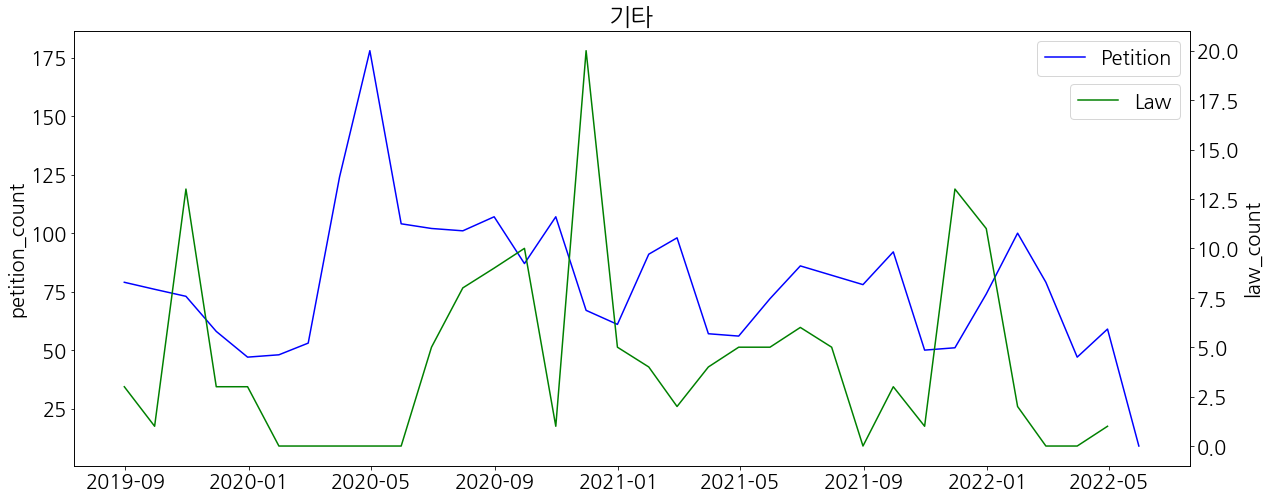

In [315]:
fig, ax1 = plt.subplots()

ax1.plot(petition_c.groupby(pd.Grouper(key='date_p',freq='1M')).sum(), label='Petition',color = 'b')

ax2 = ax1.twinx()
ax2.plot(work_L.groupby(pd.Grouper(key='date_l',freq='1M')).sum(), label='Law',color = 'g')

plt.title('기타')
ax1.set_ylabel('petition_count')
ax2.set_ylabel('law_count')

ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,0.9))

# 회귀

In [316]:
petition_m = petition_c.groupby(pd.Grouper(key='date_p',freq='1M')).sum()
petition_m.reset_index(level=0, inplace=True)
petition_m.rename(columns = {'date_p' : 'date'}, inplace = True)
petition_m

,date,work_p
0,2019-08-31,79
1,2019-09-30,76
2,2019-10-31,73
3,2019-11-30,58
4,2019-12-31,47
5,2020-01-31,48
6,2020-02-29,53
7,2020-03-31,124
8,2020-04-30,178
9,2020-05-31,104


In [317]:
law_m = work_L.groupby(pd.Grouper(key='date_l',freq='1M')).sum()
law_m.reset_index(level=0, inplace=True)
law_m.rename(columns = {'date_l' : 'date'}, inplace = True)
law_m

,date,work_l
0,2019-08-31,3
1,2019-09-30,1
2,2019-10-31,13
3,2019-11-30,3
4,2019-12-31,3
5,2020-01-31,0
6,2020-02-29,0
7,2020-03-31,0
8,2020-04-30,0
9,2020-05-31,0


In [318]:
petition_law_join = pd.merge(petition_m,law_m,on='date',how='inner')
petition_law_join

,date,work_p,work_l
0,2019-08-31,79,3
1,2019-09-30,76,1
2,2019-10-31,73,13
3,2019-11-30,58,3
4,2019-12-31,47,3
5,2020-01-31,48,0
6,2020-02-29,53,0
7,2020-03-31,124,0
8,2020-04-30,178,0
9,2020-05-31,104,0


Text(0, 0.5, 'law_count')

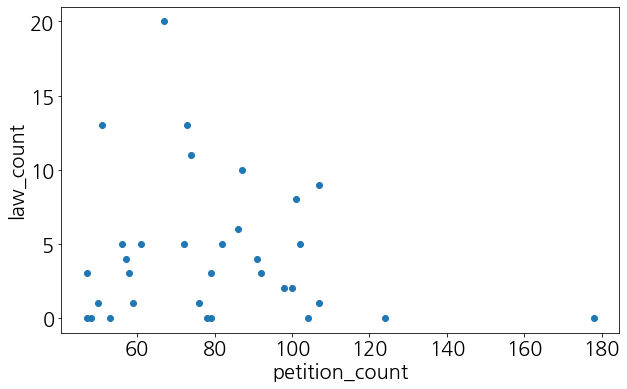

In [319]:
plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(petition_law_join['work_p'],petition_law_join['work_l'])
plt.xlabel('petition_count')
plt.ylabel('law_count')

In [320]:
import statsmodels.api as sm 
model = sm.OLS.from_formula("work_l ~ work_p", data = petition_law_join)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 work_l   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5720
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.455
Time:                        15:29:13   Log-Likelihood:                -97.510
No. Observations:                  33   AIC:                             199.0
Df Residuals:                      31   BIC:                             202.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2089      2.617      2.373      0.024       0.872      11.545
work_p        -0.0234      0.031     -0.756      0.455      -0.087       0.040
==============================================================================
Omnibus:                       14.243   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.684
Skew:                           1.385   Prob(JB):                     0.000648
Kurtosis:                       4.734   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 전체로 해보자

In [75]:
work_l = laws.groupby('INITIATION DATE')['CONTENT'].count()
work_L = work_l.to_frame()
work_L.columns = ['work_l']
work_L = work_L.rename_axis('date_l').reset_index()
work_L

,date_l,work_l
0,2019-08-01,16
1,2019-08-02,13
2,2019-08-05,15
3,2019-08-06,18
4,2019-08-07,10
...,...,...
653,2022-04-29,16
654,2022-05-02,6
655,2022-05-03,11
656,2022-05-04,16


In [76]:
work = petition.groupby('end date')['title'].count()
petition_c = work.to_frame()
petition_c.columns = ['work_p']
petition_c = petition_c.rename_axis('date_p').reset_index()
petition_c

,date_p,work_p
0,2019-08-01,18
1,2019-08-02,11
2,2019-08-03,22
3,2019-08-04,28
4,2019-08-07,51
...,...,...
706,2022-04-29,20
707,2022-04-30,16
708,2022-05-01,9
709,2022-05-04,21


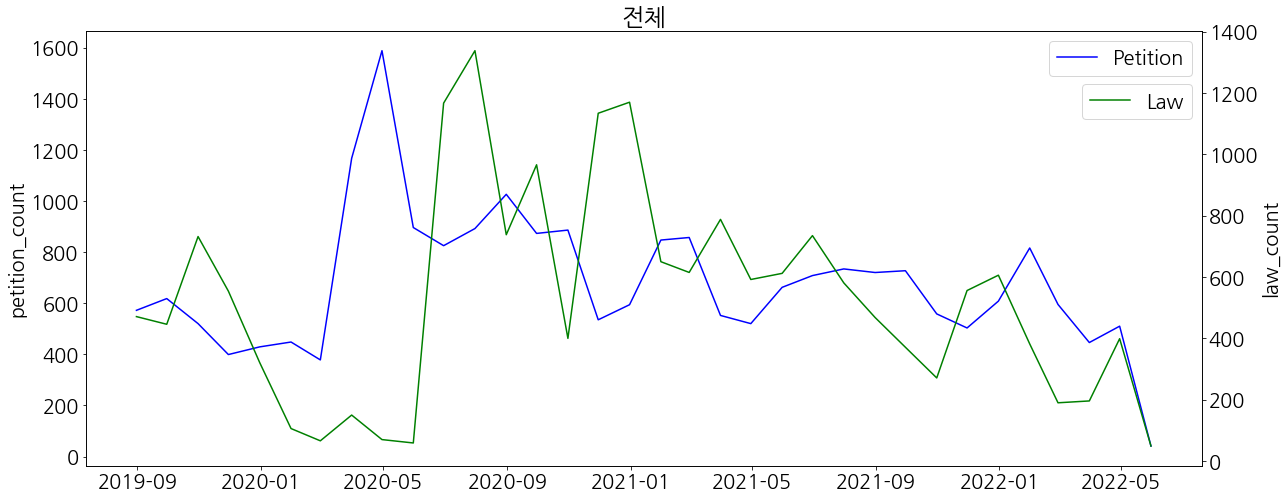

In [101]:
fig, ax1 = plt.subplots()

ax1.plot(petition_c.groupby(pd.Grouper(key='date_p',freq='1M')).sum(), label='Petition',color = 'b')

ax2 = ax1.twinx()
ax2.plot(work_L.groupby(pd.Grouper(key='date_l',freq='1M')).sum(), label='Law',color = 'g')

plt.title('전체')
ax1.set_ylabel('petition_count')
ax2.set_ylabel('law_count')

ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,0.9))

In [326]:
#전체 회귀돌리기
petition_m = petition_c.groupby(pd.Grouper(key='date_p',freq='1M')).sum()
petition_m.reset_index(level=0, inplace=True)
petition_m.rename(columns = {'date_p' : 'date'}, inplace = True)
petition_m

,date,work_p
0,2019-08-31,79
1,2019-09-30,76
2,2019-10-31,73
3,2019-11-30,58
4,2019-12-31,47
5,2020-01-31,48
6,2020-02-29,53
7,2020-03-31,124
8,2020-04-30,178
9,2020-05-31,104


In [322]:
law_m = work_L.groupby(pd.Grouper(key='date_l',freq='1M')).sum()
law_m.reset_index(level=0, inplace=True)
law_m.rename(columns = {'date_l' : 'date'}, inplace = True)
law_m

,date,work_l
0,2019-08-31,3
1,2019-09-30,1
2,2019-10-31,13
3,2019-11-30,3
4,2019-12-31,3
5,2020-01-31,0
6,2020-02-29,0
7,2020-03-31,0
8,2020-04-30,0
9,2020-05-31,0


In [327]:
petition_law_join = pd.merge(petition_m,law_m,on='date',how='inner')
petition_law_join

,date,work_p,work_l
0,2019-08-31,79,3
1,2019-09-30,76,1
2,2019-10-31,73,13
3,2019-11-30,58,3
4,2019-12-31,47,3
5,2020-01-31,48,0
6,2020-02-29,53,0
7,2020-03-31,124,0
8,2020-04-30,178,0
9,2020-05-31,104,0


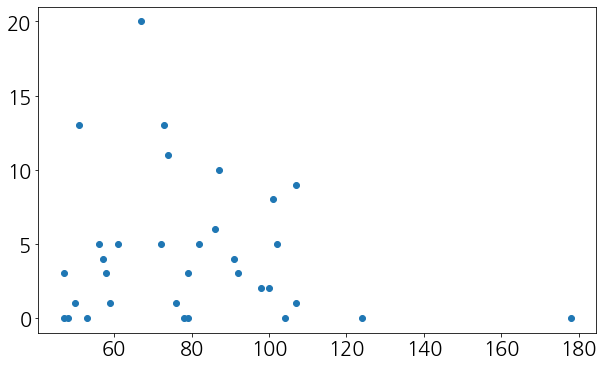

In [328]:
plt.scatter(petition_law_join['work_p'],petition_law_join['work_l'])

In [329]:
import statsmodels.api as sm 
model = sm.OLS.from_formula("work_l ~ work_p", data = petition_law_join)
result = model.fit()
result.summary()s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 work_l   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5720
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.455
Time:                        15:37:23   Log-Likelihood:                -97.510
No. Observations:                  33   AIC:                             199.0
Df Residuals:                      31   BIC:                             202.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2089      2.617      2.373      0.024       0.872      11.545
work_p        -0.0234      0.031     -0.756      0.455      -0.087       0.040
==============================================================================
Omnibus:                       14.243   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.684
Skew:                           1.385   Prob(JB):                     0.000648
Kurtosis:                       4.734   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""